# Weekly Project: Predicting Boston Housing prices

In this project, you will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. **Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Your task is to apply a machine learning model of your choice to predict the price of houses in a Boston neighborhood (which is column 'MEDV')


The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


Here are the few steps you can follow



# Step 1: Data Exploration (EDA)

Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**Question**: For each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each by plotting or calculating the correlation



In [ ]:
import numpy as np
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt

# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
# from sklearn.base import BaseEstimator, TransformerMixin


# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')
pd.options.display.float_format = "{:.2f}".format 

# Add missing values
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.58,4.98,15.30,504000.00
1,6.42,9.14,17.80,453600.00
2,7.18,4.03,17.80,728700.00
3,7.00,2.94,18.70,701400.00
4,7.15,5.33,18.70,760200.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


<Figure size 864x720 with 0 Axes>

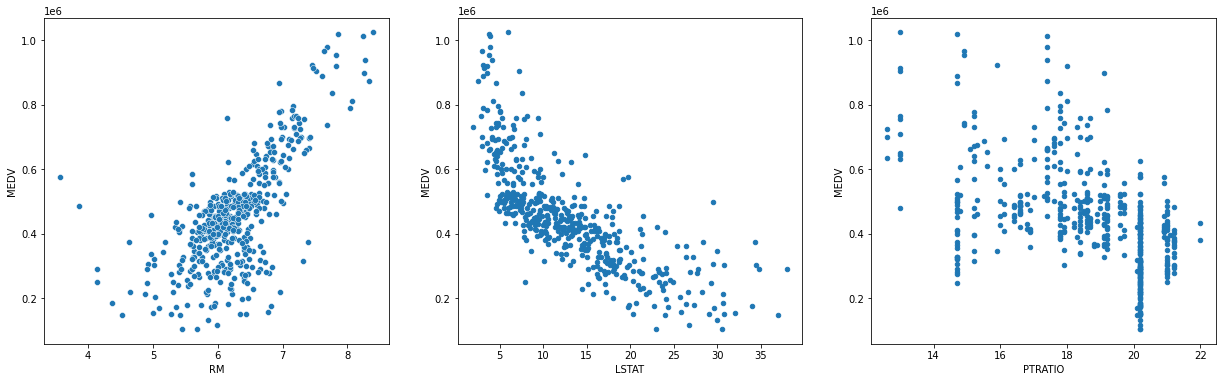

In [ ]:
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots(1, 3, figsize=(21, 6))
sns.scatterplot(data=df,x='RM',y='MEDV',ax=ax[0])
df.plot.scatter(x='LSTAT',y='MEDV',ax=ax[1])
df.plot.scatter(x='PTRATIO',y='MEDV',ax=ax[2])


**Có thể phỏng đoán RM, LSTAT có liên quan, còn PTRATIO không liên quan đến biên MEDV**

In [ ]:
df.corr().style.background_gradient(cmap='Blues')

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


**PTRATIO rõ ràng có độ liên quan kém hơn 2 biến kia với MEDV**

# Step 2: Get to know our performance Metric

Do a quick read on Mean Absolute Error (MAE), because that is going to be the metric we are going to use for this task.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

**Question**: Calculate MAE on these data points by using the Sklearn library
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
mae = mean_absolute_error(y_true,y_pred)

y_true_mean = np.array(y_true).mean()
mae / y_true_mean 

0.19108280254777069

Với mức MAE ~0.6 so với mean của y_true là ~20% => model chạy tốt !

# Step 3: Train our machine learning model

Your task is to build a pipeline to preprocess this data and train a linear regression model to predict the house price. Make sure to follow all the recommended practices we mention in class. 

Here are 2 pipelines you should implement 
- The first pipeline include: MinMaxScaler (or Standard Scaler) as **Transformer** (to preprocess), and Linear Regression as **Estimator** (machine learning model)

- The second pipeline include: Polynomial Feature, **then** Standard Scaler as **Transformers**, and Linear Regression as **Estimator**. Pay attention that you have 2 transformers in a very specific order.






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df[['MEDV','RM']]

,MEDV,RM
0,504000.00,6.58
1,453600.00,6.42
2,728700.00,7.18
3,701400.00,7.00
4,760200.00,7.15
...,...,...
484,470400.00,6.59
485,432600.00,6.12
486,501900.00,6.98
487,462000.00,6.79


In [ ]:
# Define your first pipeline here
pipe1 = Pipeline(
    [('mmTransformer', MinMaxScaler()),
     ('estimator',LinearRegression())     
    ]
)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Define your second pipeline here
pipe2 = Pipeline(
    [('PolynomialFeatures',PolynomialFeatures(2)),
     ('stdTransformer',StandardScaler()),
     ('estimator',LinearRegression())      
    ]
)

## Part 1: Use a simple train-test split

*Do these following step for the first pipeline only*:

- Use sklearn `train_test_split` to split data into train set and test set. Use random_state = 42
- Fit the pipeline on train set
- Use pipline to predict the test set
- Calculate the MAE on test set

In [ ]:
# YOUR CODE HERE
#Create X_train, Y_train, X_Test, Y_Test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['MEDV']),df['MEDV'],test_size=0.2,random_state=42
)

In [ ]:
pipe1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('mmTransformer',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
#print out pipe1 result
print(pipe1['estimator'].coef_)
print(pipe1['estimator'].intercept_)

[ 422377.49890323 -382236.7369749  -181649.45678709]
454465.58963392145


In [ ]:
#Create predict set to analyze
y_train_pred = pipe1.predict(X_train)
mae1 = mean_absolute_error(y_train,y_train_pred)
mae1

66173.47210488864

## Part 2: Use 5 fold cross-validation without polynomial features

*Do these following steps for first pipeline*

You don't do a simple train-test split. Instead, you will **do train-test split 5 times** and then calculate the mean of the MAE score for these 5 test set.

Take a look at sklearn cross_validation here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html and write the code to **calculate the mean of MAE of these 5-fold cross validation results**



*Hint*: You need to read the documentation to know exactly what will be returned when you use `cross_val_score(your_pipeline, X,y, scoring="neg_mean_absolute_error")`. And note that the only scoring that similar to MAE in `cross_val_score` is `neg_mean_absolute_error`, which means the result will be negative MAE. All you need to do is multiply the result by -1 to turn them into positive MAE.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# YOUR CODE HERE
scores = cross_val_score(pipe1,X_train,y_train,scoring="neg_mean_absolute_error")
scores.mean()*-1

67221.78844633946

## Part 3: Use 5 fold cross-validation with polynomial features

*Do these following steps for first pipeline*

Repeat everything in **Part 2** on the second pipeline (The one with Polynomial Feature as one of the transformer). For this one, write a `for` loop to test out different degree for Polynomial Feature. Here is roughly what your code should look like
```
for each value n in a range of your choice:
    - create a pipeline including Polynomial Feature(degree=n) => MinMaxScaler => Linear Regression
    - call cross_val_score on this pipeline
    - calculate mean of MAE scores from cross validation
```



In [ ]:
# YOUR CODE HERE
for i in range(2,10):
  pipei = Pipeline(
      [('PolynomialFeatures',PolynomialFeatures(i)),
       ('stdTransformer',StandardScaler()),
       ('estimator',LinearRegression())        
      ]  
  )
  scores = cross_val_score(pipei,X_train,y_train,scoring='neg_mean_absolute_error')
  print(f'with degree = {i}')
  print(f'mae =', scores.mean()*-1)
  

with degree = 2
mae = 54116.661145499595
with degree = 3
mae = 53175.49465617437
with degree = 4
mae = 59978.8655728684
with degree = 5
mae = 65560.09128984367
with degree = 6
mae = 226441.10490795053
with degree = 7
mae = 1365264.8301500694
with degree = 8
mae = 12592723.508436058
with degree = 9
mae = 110873900.09846468


*Bonus*: after you finish this lab, go back to this question, and consider a better way to search for the best degree by using gridsearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Step 4: Reporting your MAE

From part 2 and part 3, which pipeline ends up with the lowest mean MAE from cross validation? And what is that MAE?

**MAE thấp nhất:**
* mae = 53175.49465617437
* Pipeline 2 với with degree = 3


# Step 5: Making predictions

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

Based on your model, what price would you recommend each client sell his/her home at?


Note that at this point, you haven't had a trained model to make the prediction on this data. So we will create a pipeline and train it.

To do this question, you need to
- Redefine the best pipeline that you report in step 4
- **Fit** this pipeline on the entire dataset given at the beginning (we don't need to do train/test split here as we already know this is our best pipeline)
- Manually create a new test data including 3 clients from the table above
- Use the pipeline you have fitted to **predict** this new test data
- Save the prediction to a variable called `client_preds`

In [ ]:
#define pipeline 3 degree
pipe3de = Pipeline(
      [('PolynomialFeatures',PolynomialFeatures(3)),
       ('stdTransformer',StandardScaler()),
       ('estimator',LinearRegression())        
      ]  
  )

In [ ]:
#Fit the pipeline
pipe3de.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('PolynomialFeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stdTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

5,17,15

In [ ]:
# create X test dataframe 
X_test = pd.DataFrame(np.array([[5,17,15],[4,32,22],[8,3,12]]))
X_test.columns = ['RM','LSTAT','PTRATIO']
X_test

,RM,LSTAT,PTRATIO
0,5,17,15
1,4,32,22
2,8,3,12


In [ ]:
client_preds = pipe3de.predict(X_test)
client_preds

array([ 336512.86711233,  158921.77717015, 1073860.92303721])

After you have your variable `client_preds`, run this code to visualize your predictions against the home prices (MEDV)

```python
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
```

Note that 
- `client_preds` should be a vector of size 3 (since we only have 3 records in the new test set) 
- `y` should be the column MEDV in the dataset you use to train

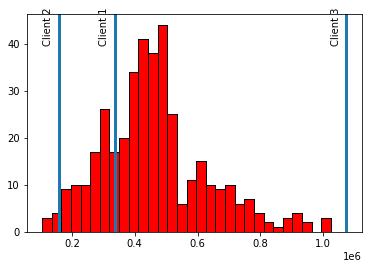

In [ ]:
# your code here
import matplotlib.pyplot as plt

for i,price in enumerate(client_preds):
    plt.hist(y_train, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)

Do these prices seem reasonable given the values for the respective features?

In [ ]:
X_test

,RM,LSTAT,PTRATIO
0,5,17,15
1,4,32,22
2,8,3,12


In [ ]:
X_test['MEDV'] = client_preds
X_test

,RM,LSTAT,PTRATIO,MEDV
0,5,17,15,336512.87
1,4,32,22,158921.78
2,8,3,12,1073860.92


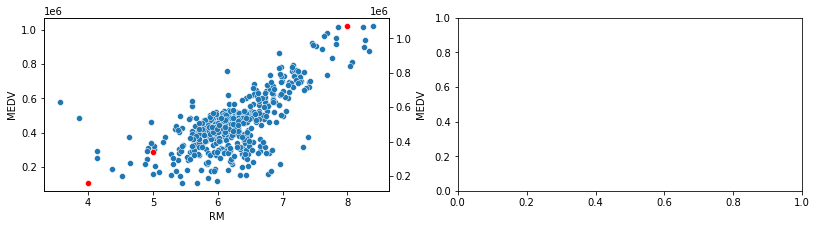

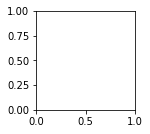

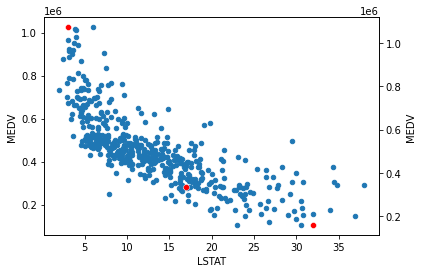

In [ ]:
plt.figure(figsize=(21, 7))
plt.subplot(231)
sns.scatterplot(data=df,x='RM',y='MEDV')
plt.twinx()
sns.scatterplot(data=X_test,x='RM',y='MEDV',color='r')

plt.subplot(232)
df.plot.scatter(x='LSTAT',y='MEDV')
plt.twinx()
sns.scatterplot(data=X_test,x='LSTAT',y='MEDV',color='r')


plt.subplot(233)
df.plot.scatter(x='LSTAT',y='MEDV')
plt.twinx()
sns.scatterplot(data=X_test,x='LSTAT',y='MEDV',color='r')

# df.plot.scatter(x='PTRATIO',y='MEDV',ax=ax[2])




# Step 6: Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?